In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

#***Load Dataset:-***

In [3]:
#load csv files
df = pd.read_csv('/content/heart_attack_predictions.csv')

In [4]:
df.head()

,Country,Age,Gender,Cholesterol_Level,Blood_Pressure,Smoking_History,Alcohol_Consumption,Physical_Activity,Obesity,Diabetes,...,LDL_Cholesterol,Triglycerides,Heart_Disease_Risk,Medication_Adherence,Urbanization_Level,Air_Pollution_Exposure,Access_To_Healthcare,Education_Level,Income_Level,Heart_Attack_Outcome
0,Germany,39,Male,210.091036,173.301650,Never,0.531933,Active,No,No,...,68.333573,165.060897,Medium,No,Urban,51.988416,Good,Tertiary,Low,Died
1,Egypt,88,Male,163.998730,137.381678,Former,5.626668,Sedentary,Yes,Yes,...,98.194015,452.124651,Medium,No,Suburban,97.739896,Good,NaN,Low,Died
2,Spain,60,Female,263.502590,139.737677,Former,0.928015,Active,No,Yes,...,118.767677,171.432620,Low,No,Urban,60.352793,Poor,Tertiary,Low,Survived
3,Canada,25,Female,292.003927,85.992807,Former,7.374519,Active,No,Yes,...,190.190597,329.553258,Medium,No,Urban,14.397347,Good,Secondary,High,Survived
4,France,54,Female,267.736563,119.882856,Former,4.317845,Sedentary,Yes,No,...,188.209372,449.953074,High,Yes,Rural,69.448684,Good,NaN,Low,Died


In [5]:
#shape of dataset
df.shape

(623027, 30)

#***EDA(Explotary Data Analysis):-***

In [6]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623027 entries, 0 to 623026
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Country                  623027 non-null  object 
 1   Age                      623027 non-null  int64  
 2   Gender                   623027 non-null  object 
 3   Cholesterol_Level        623027 non-null  float64
 4   Blood_Pressure           623027 non-null  float64
 5   Smoking_History          623027 non-null  object 
 6   Alcohol_Consumption      623027 non-null  float64
 7   Physical_Activity        623027 non-null  object 
 8   Obesity                  623027 non-null  object 
 9   Diabetes                 623027 non-null  object 
 10  Family_History           623027 non-null  object 
 11  Stress_Levels            623027 non-null  float64
 12  Dietary_Habits           623027 non-null  object 
 13  Heart_Attack_History     623027 non-null  object 
 14  Ches

In [7]:
#dataset describe
df.describe()

,Age,Cholesterol_Level,Blood_Pressure,Alcohol_Consumption,Stress_Levels,Max_Heart_Rate_Achieved,HDL_Cholesterol,LDL_Cholesterol,Triglycerides,Air_Pollution_Exposure
count,623027.000000,623027.000000,623027.000000,623027.000000,623027.000000,623027.000000,623027.000000,623027.000000,623027.000000,623027.000000
mean,53.506029,224.923182,130.008723,5.000483,5.506905,129.487062,60.031668,125.043638,274.857978,54.974987
std,20.791615,43.272619,28.875588,2.888441,2.598430,40.424069,23.112245,43.280826,129.925033,25.942410
min,18.000000,150.000057,80.000100,0.000014,1.000014,60.000000,20.000071,50.000057,50.001096,10.000151
25%,35.000000,187.551255,105.007014,2.501110,3.257009,94.000000,39.990083,87.571144,162.201635,32.547015
50%,53.000000,224.835733,130.036666,5.001672,5.511778,129.000000,60.055936,125.047625,275.026028,54.946690
75%,72.000000,262.426382,154.982690,7.497314,7.758713,164.000000,80.027313,162.531874,387.265494,77.419095
max,89.000000,299.999907,179.999789,9.999990,9.999970,199.000000,99.999982,199.999924,499.999209,99.999881


In [8]:
#check the missing values
df.isnull().sum()

,0
Country,0
Age,0
Gender,0
Cholesterol_Level,0
Blood_Pressure,0
Smoking_History,0
Alcohol_Consumption,0
Physical_Activity,0
Obesity,0
Diabetes,0


In [9]:
#drop the column education lavel column that not relevent to heart attck
df.drop('Education_Level',axis=1,inplace=True)

In [10]:
#check the missing values
df.isnull().sum().any()

False

In [11]:
#check duplicated
df.duplicated().sum()

0

In [12]:
#drop unncessary column
df.drop('Country',axis=1,inplace=True)

In [13]:
cat_col=df.select_dtypes(include='object').columns
cat_col

Index(['Gender', 'Smoking_History', 'Physical_Activity', 'Obesity', 'Diabetes',
       'Family_History', 'Dietary_Habits', 'Heart_Attack_History',
       'Chest_Pain', 'Exercise_Induced_Angina', 'Resting_ECG', 'Thalassemia',
       'Heart_Disease_Risk', 'Medication_Adherence', 'Urbanization_Level',
       'Access_To_Healthcare', 'Income_Level', 'Heart_Attack_Outcome'],
      dtype='object')

In [14]:
num_col=df.select_dtypes(exclude='object').columns
num_col

Index(['Age', 'Cholesterol_Level', 'Blood_Pressure', 'Alcohol_Consumption',
       'Stress_Levels', 'Max_Heart_Rate_Achieved', 'HDL_Cholesterol',
       'LDL_Cholesterol', 'Triglycerides', 'Air_Pollution_Exposure'],
      dtype='object')

#***Data Visualization:-***

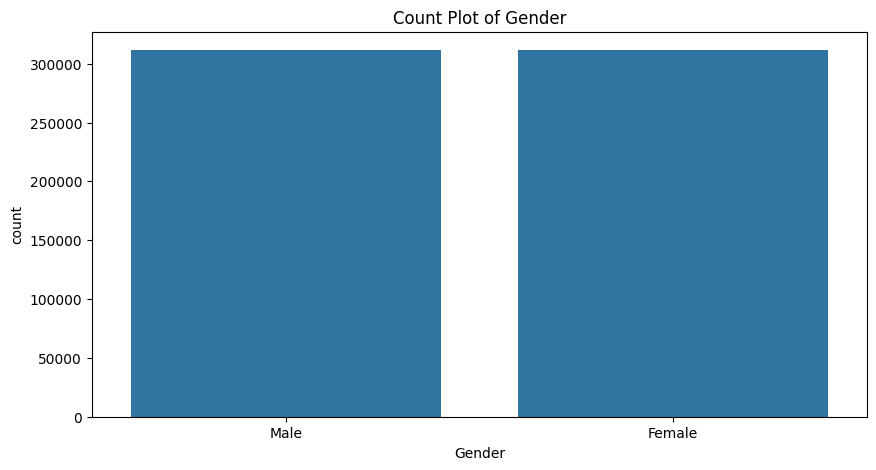

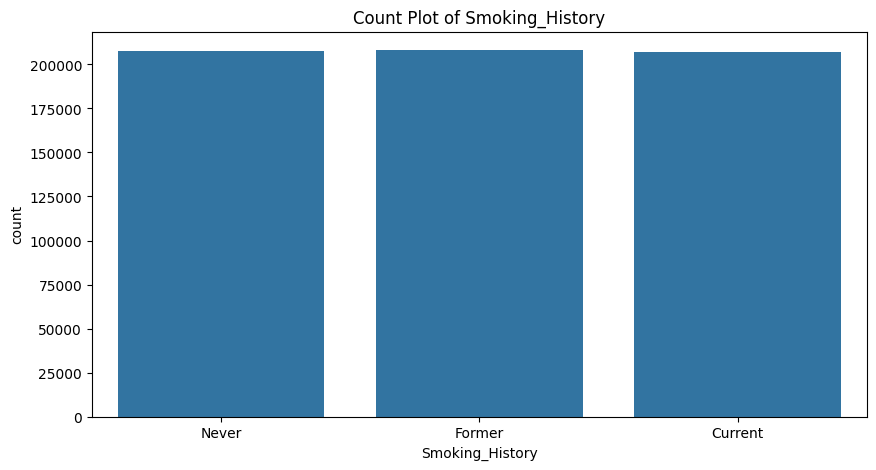

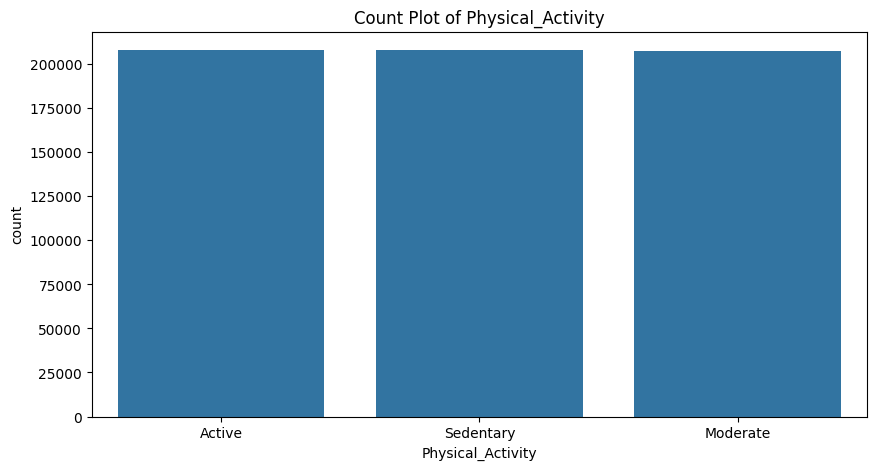

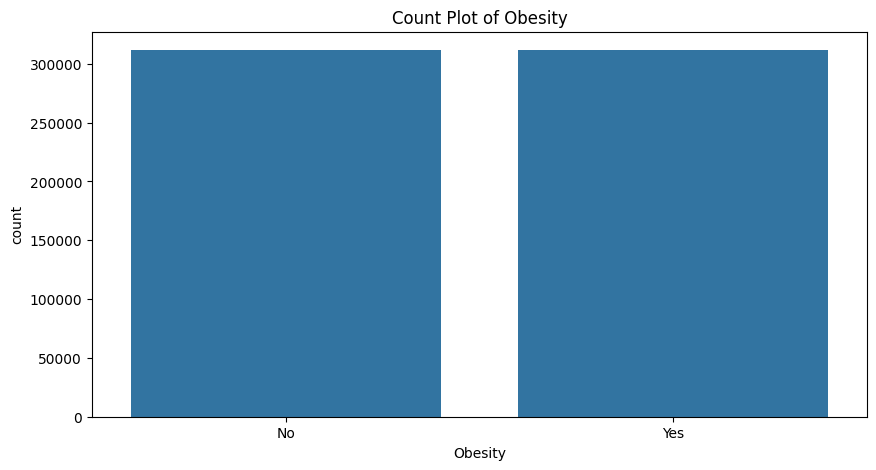

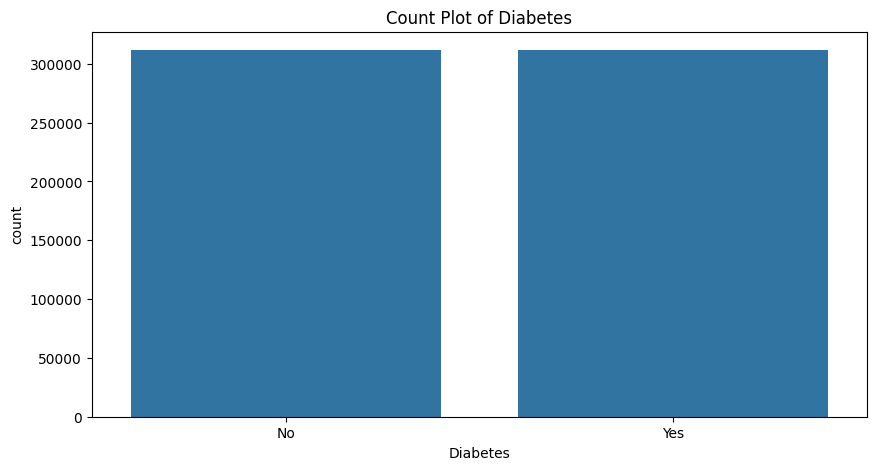

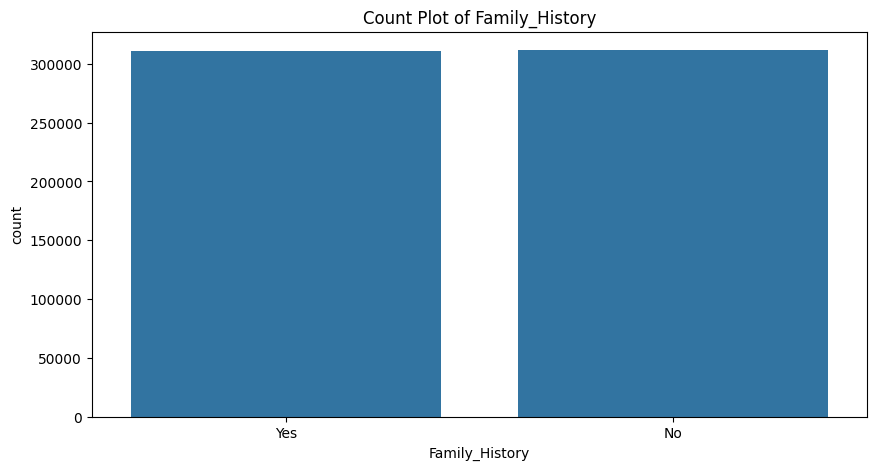

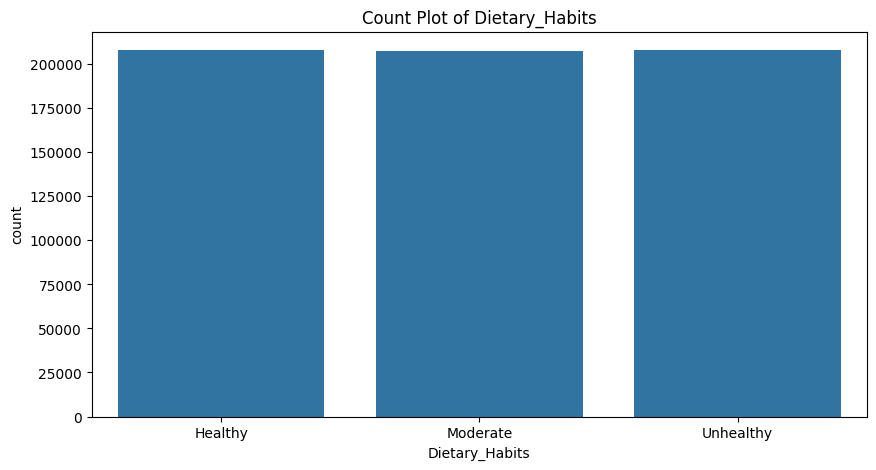

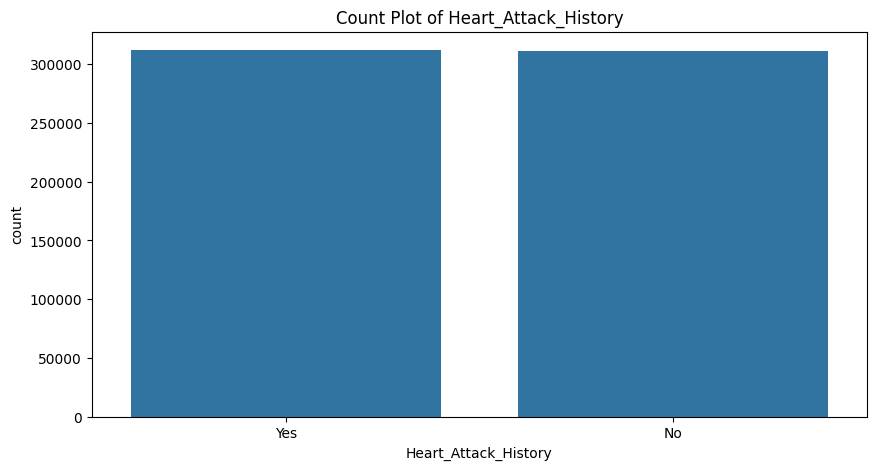

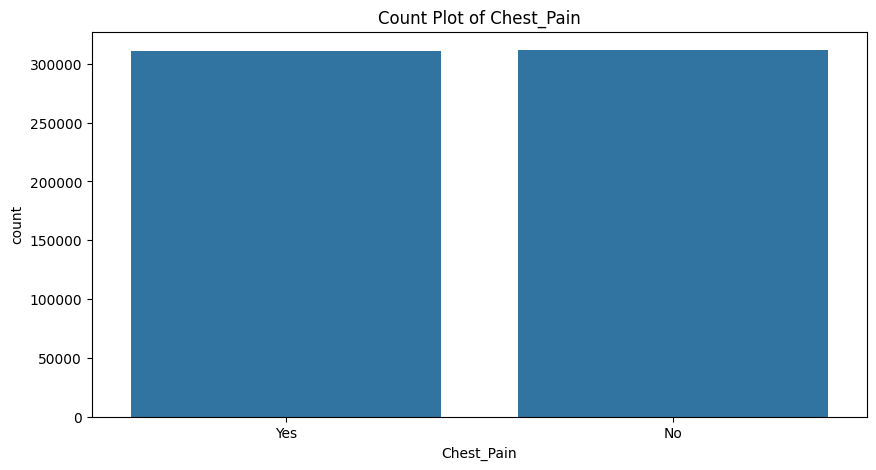

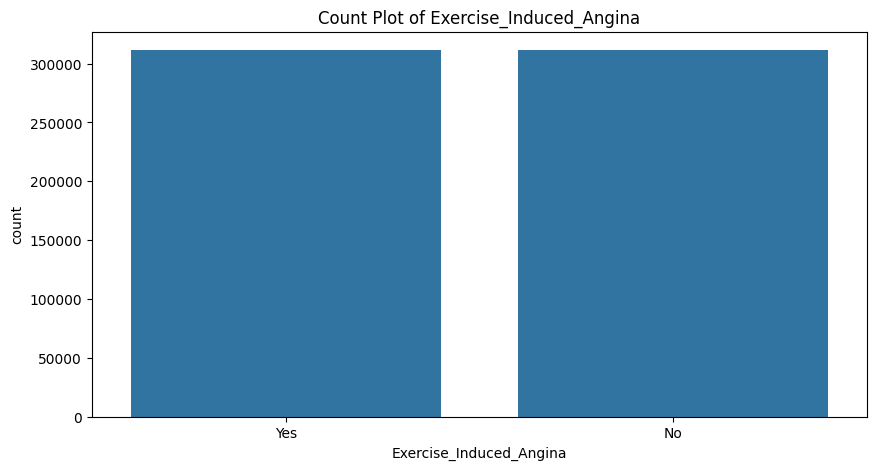

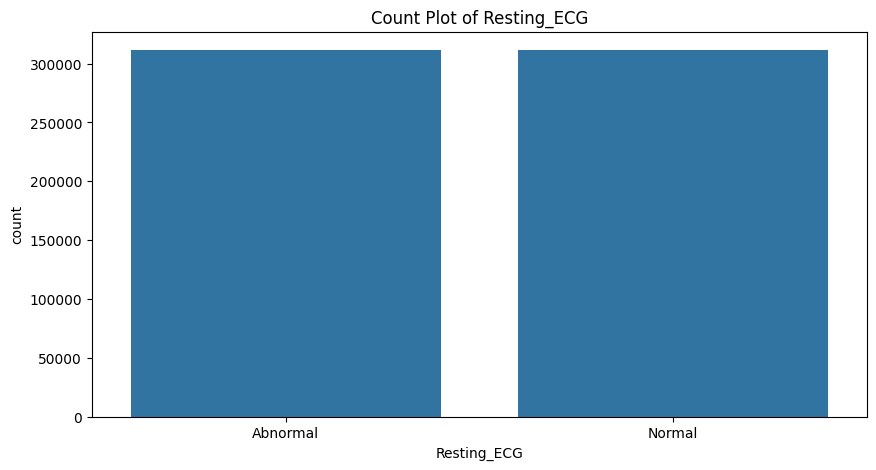

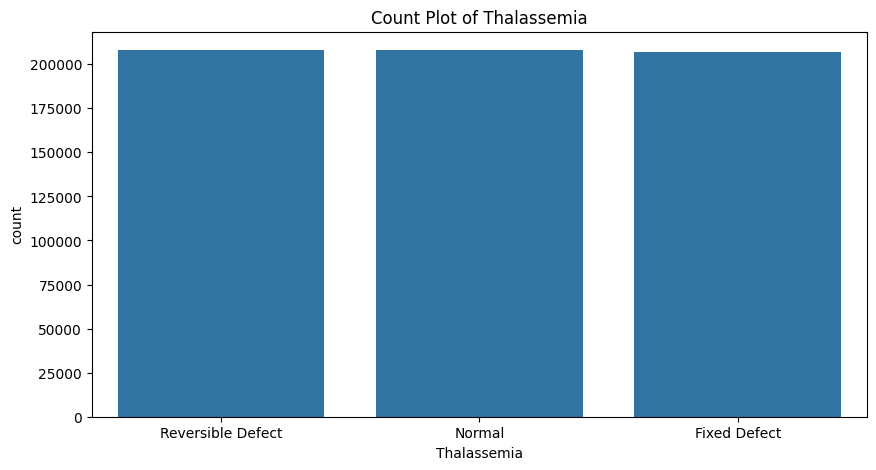

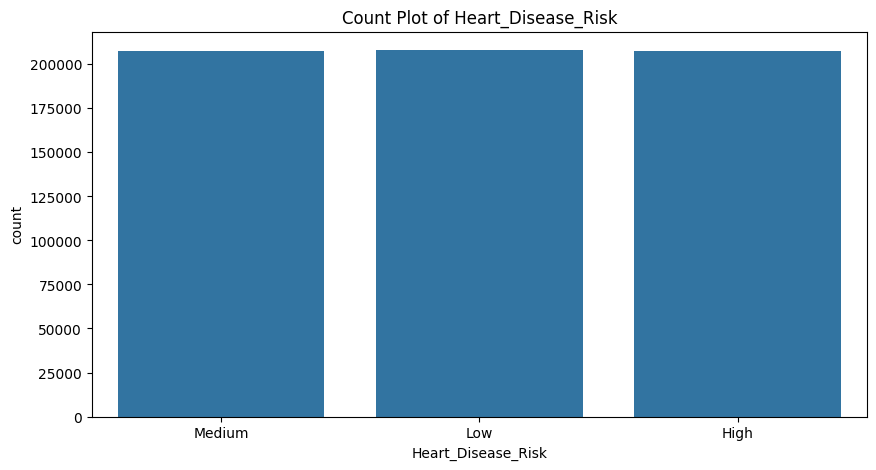

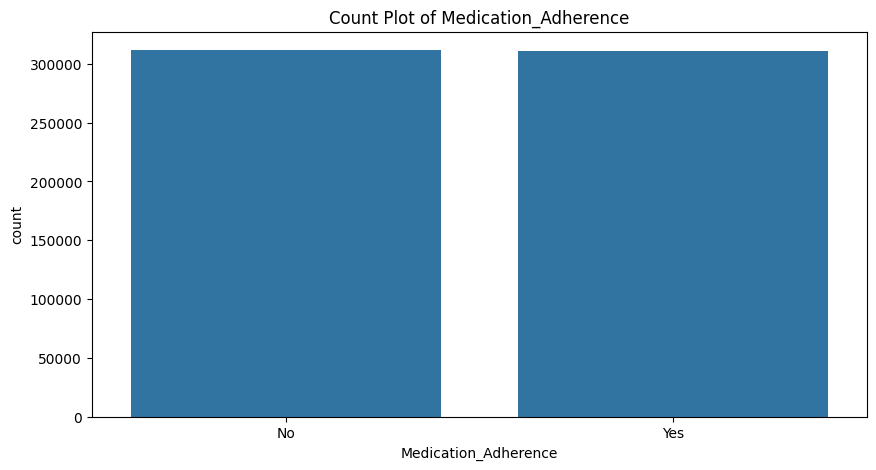

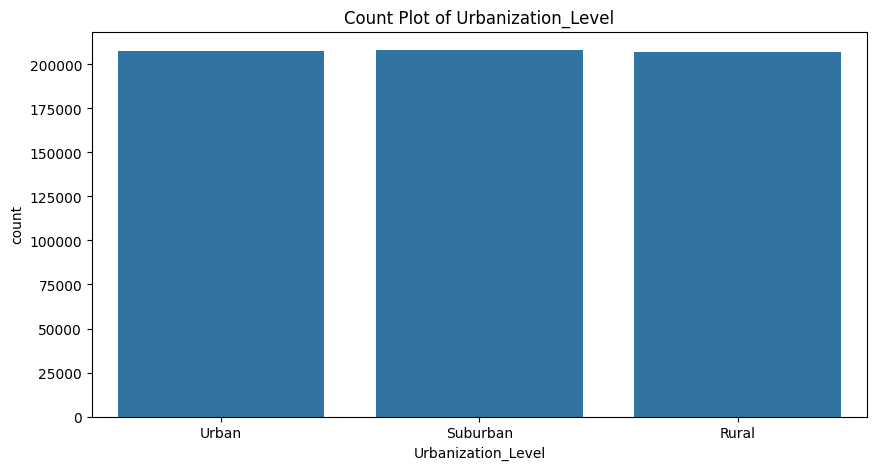

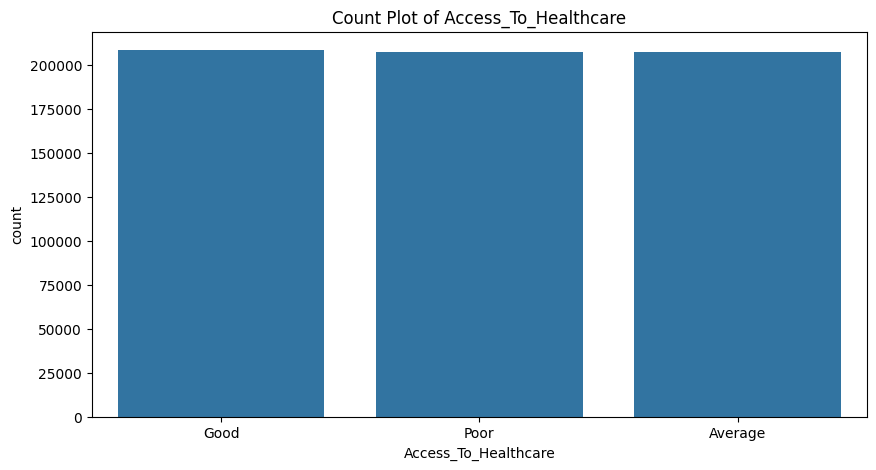

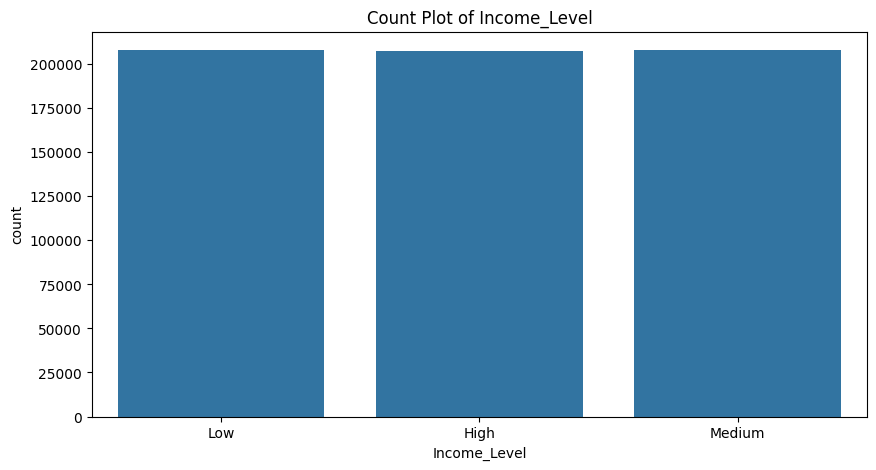

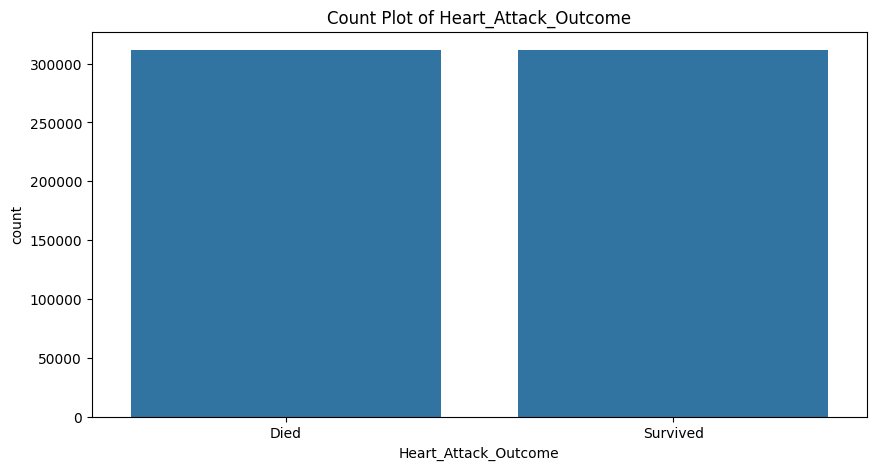

In [15]:
#data Visualization of categorical column
for col in cat_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x=col,data=df)
  plt.title(f'Count Plot of {col}')
  plt.show()

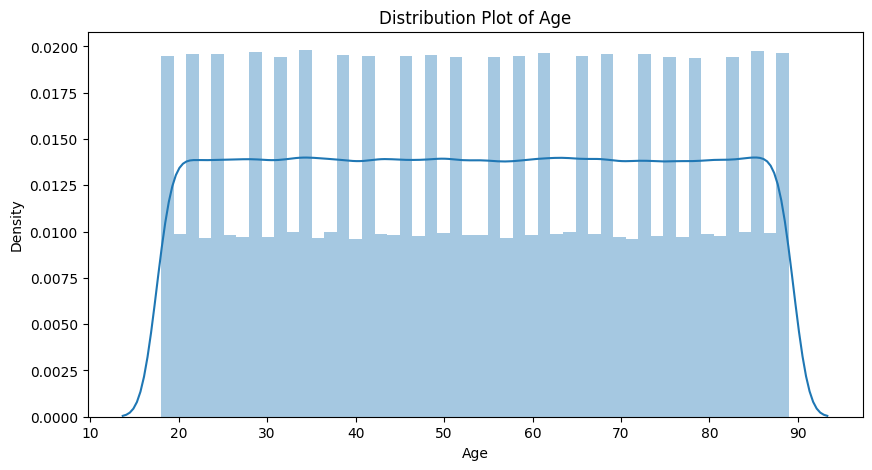

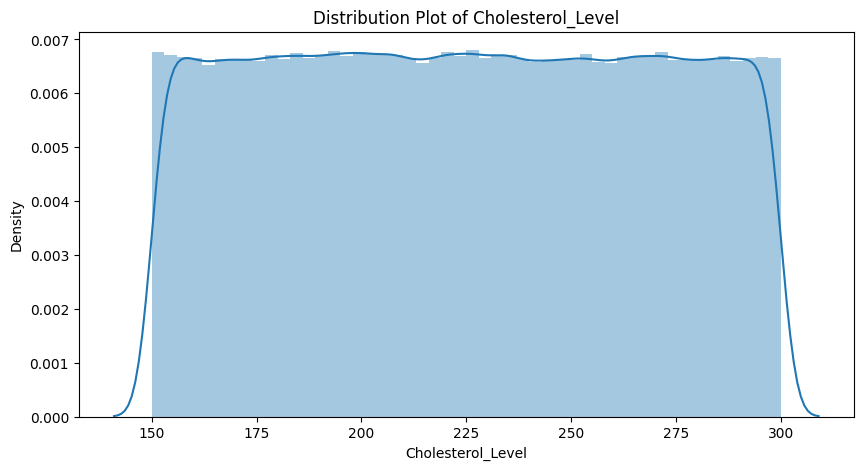

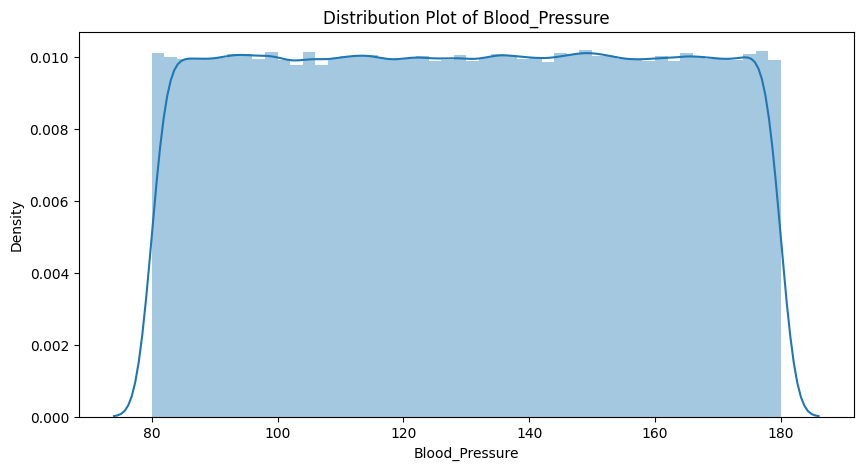

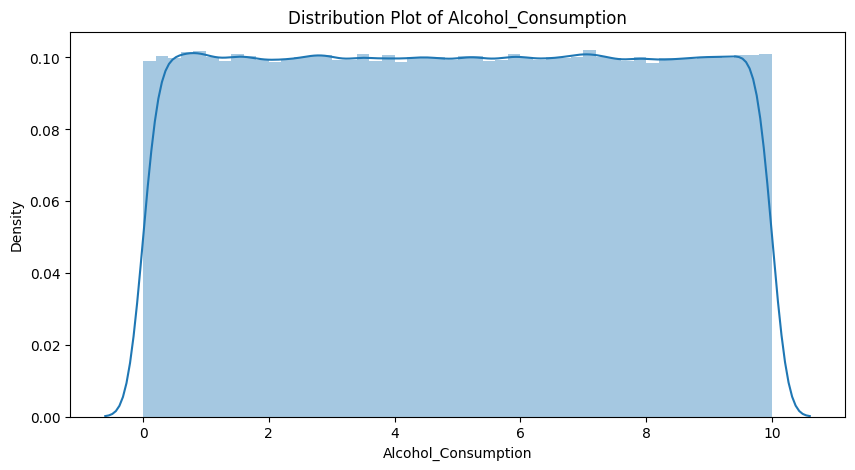

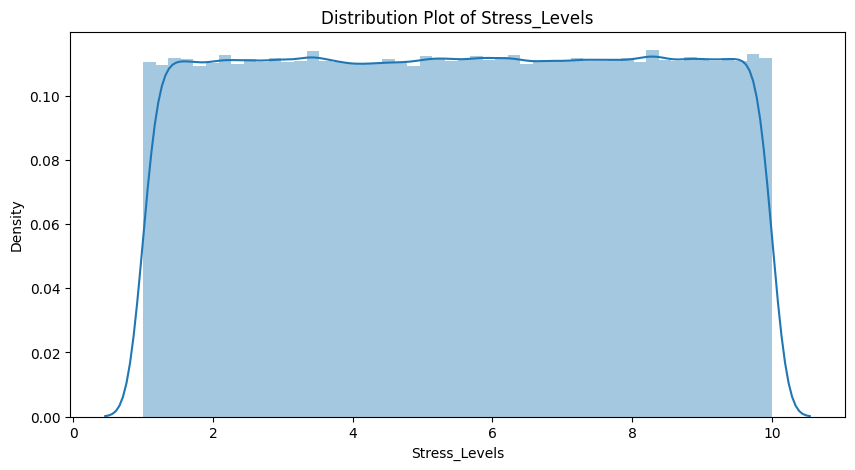

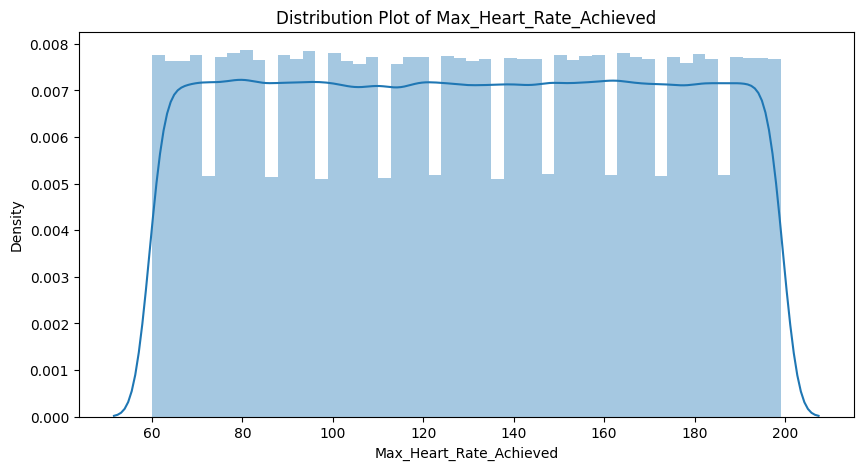

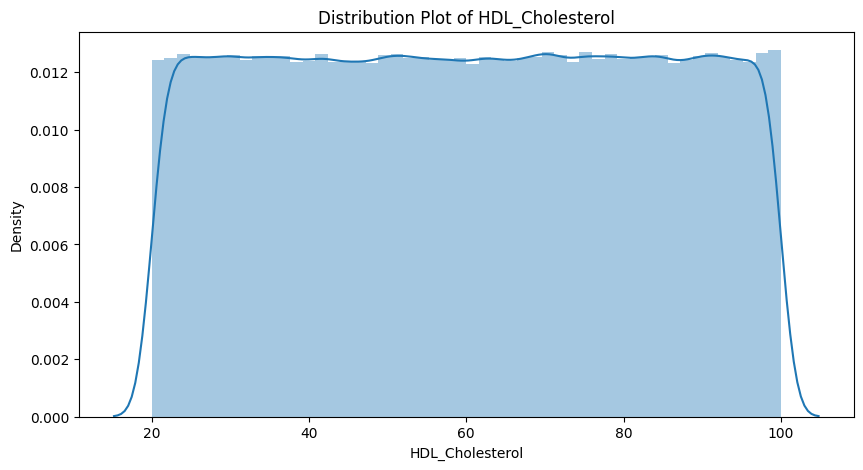

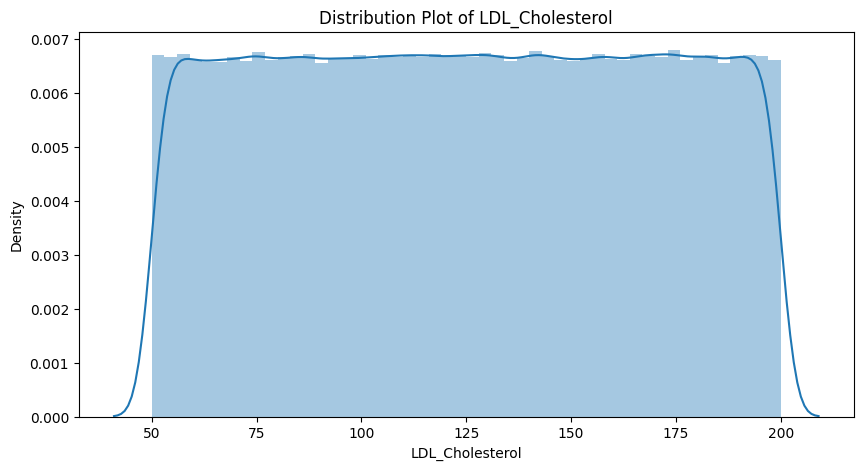

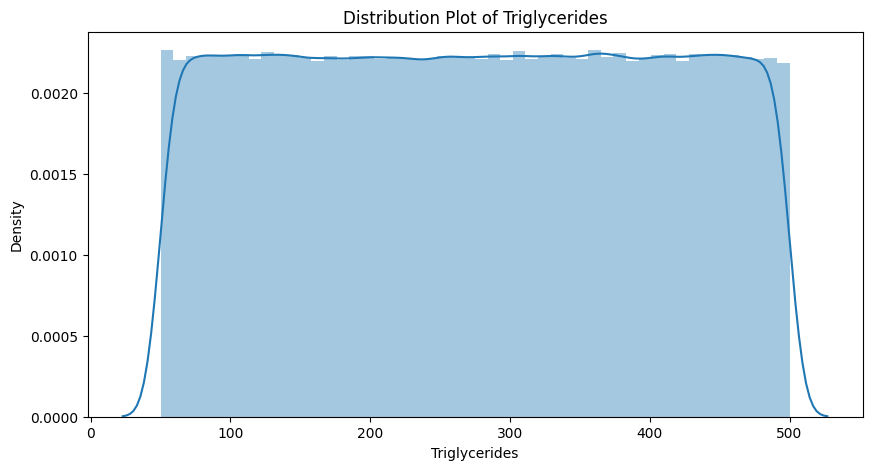

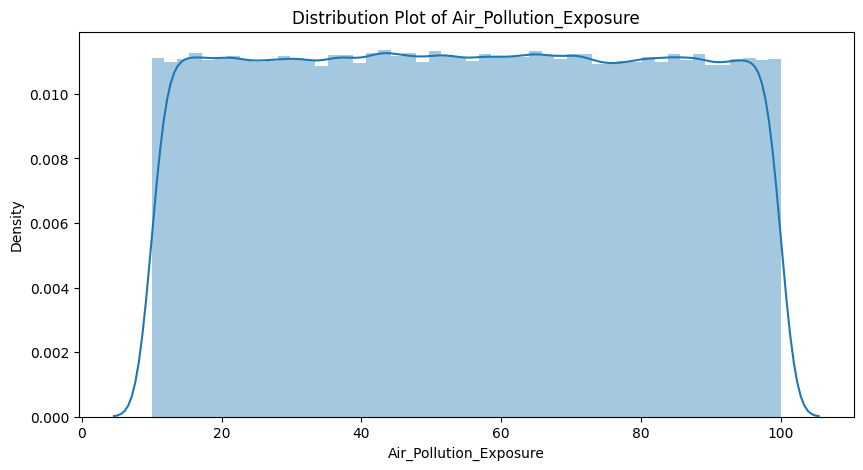

In [16]:
#data visualization numerical column distribution
for col in num_col:
  plt.figure(figsize=(10,5))
  sns.distplot(df[col])
  plt.title(f'Distribution Plot of {col}')
  plt.show()

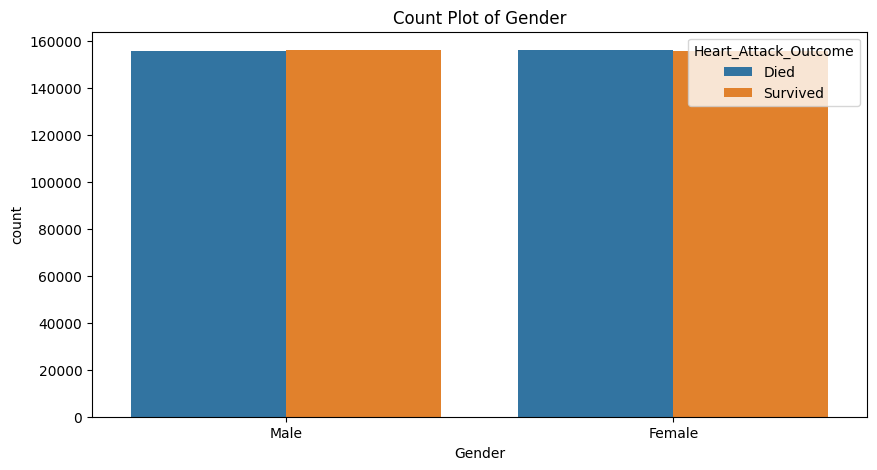

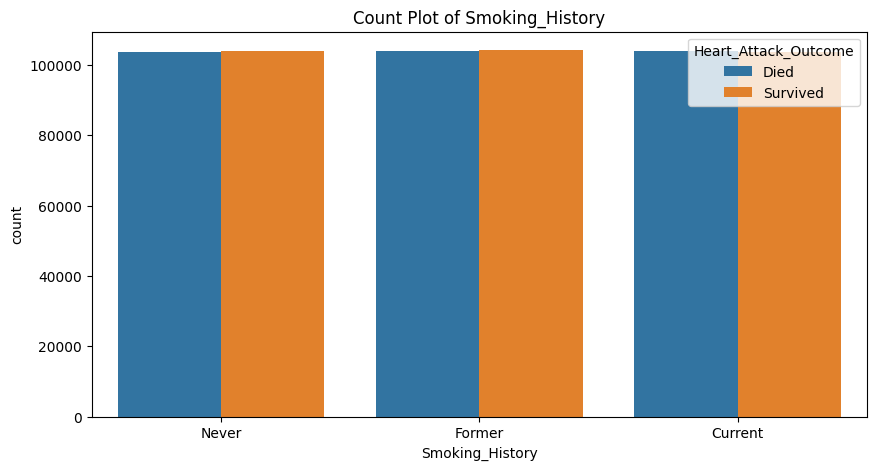

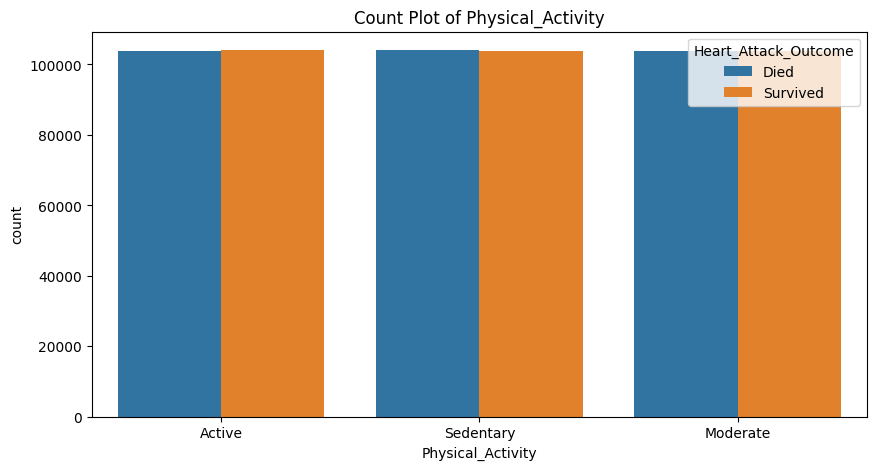

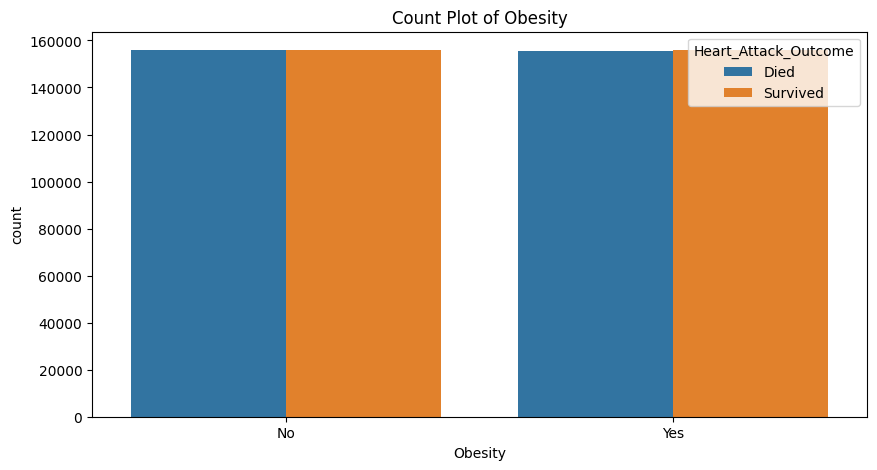

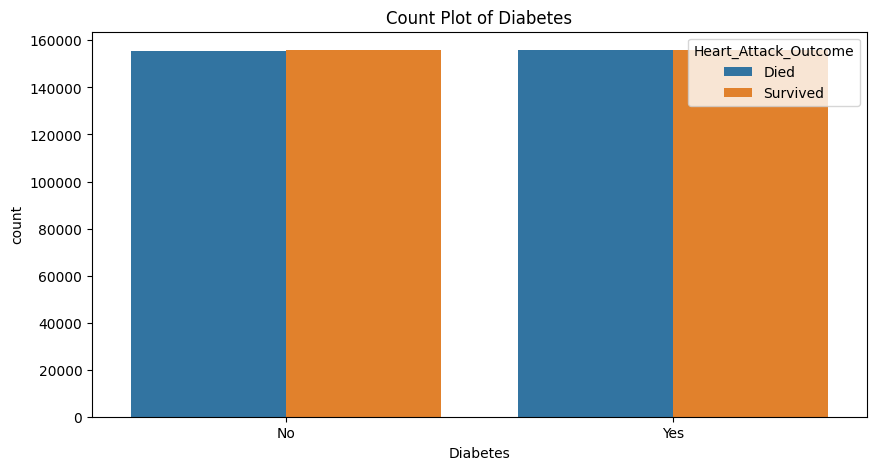

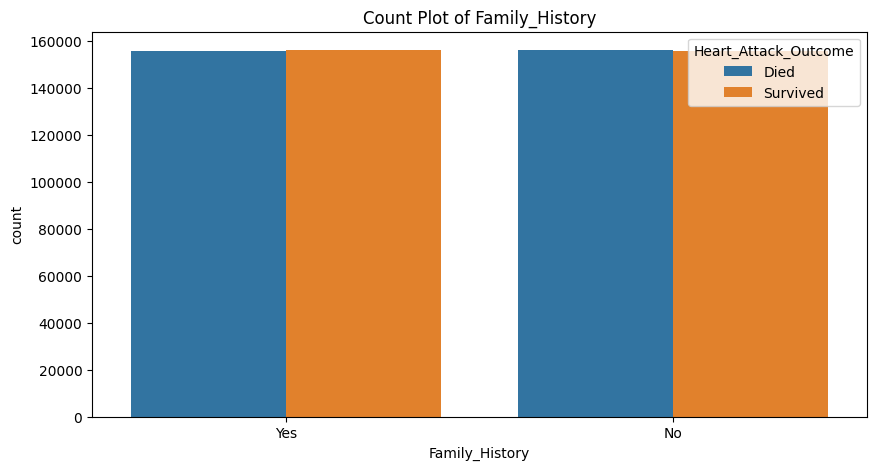

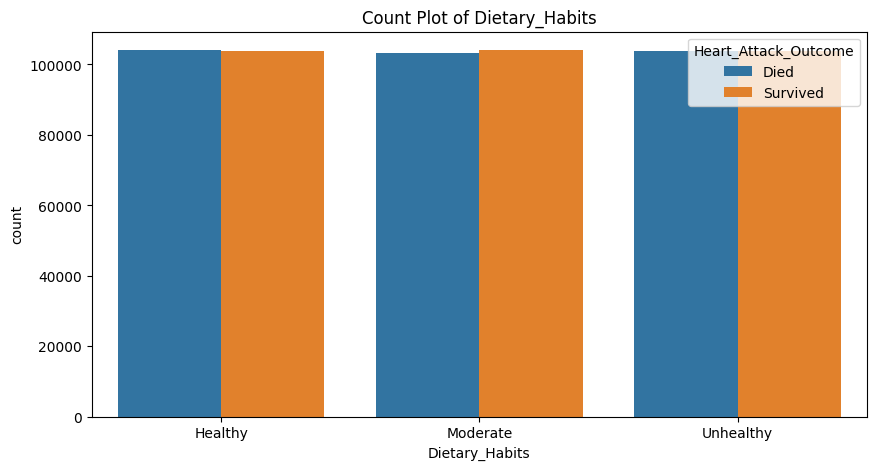

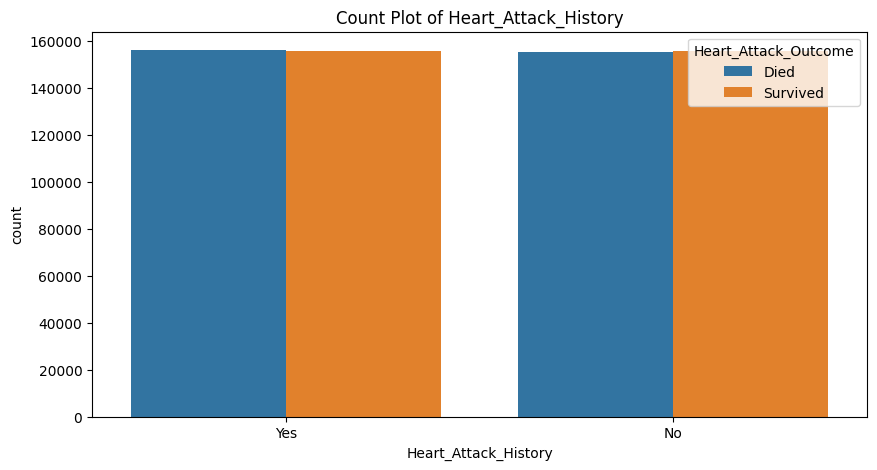

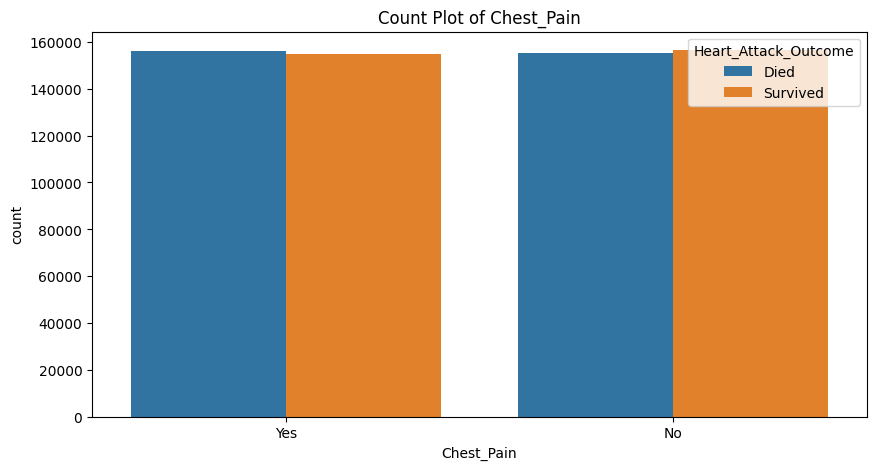

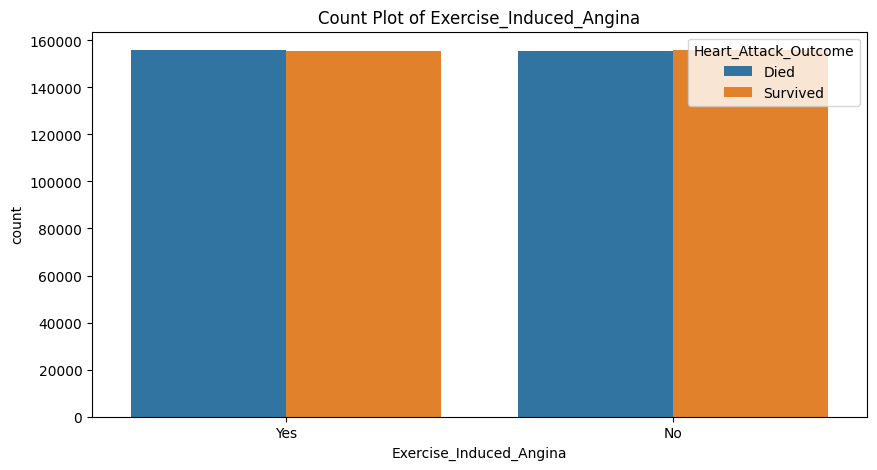

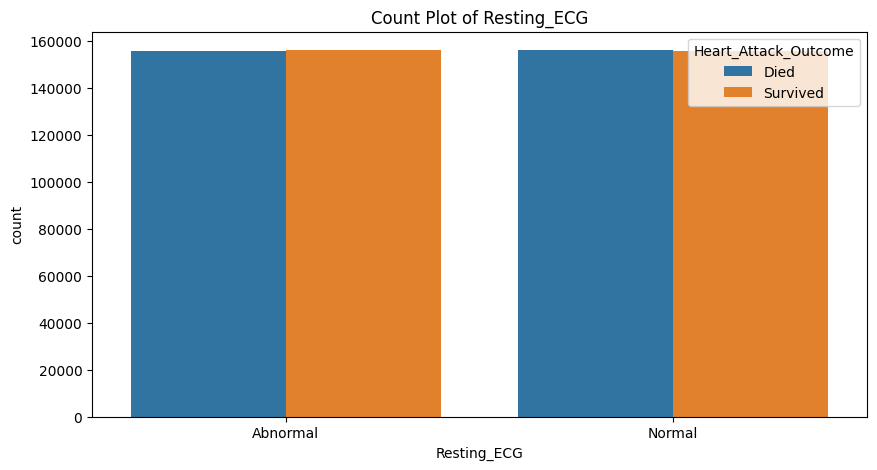

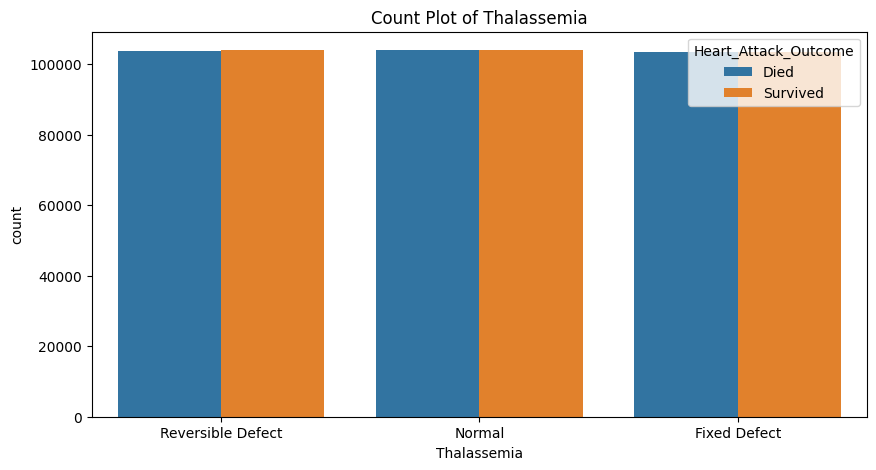

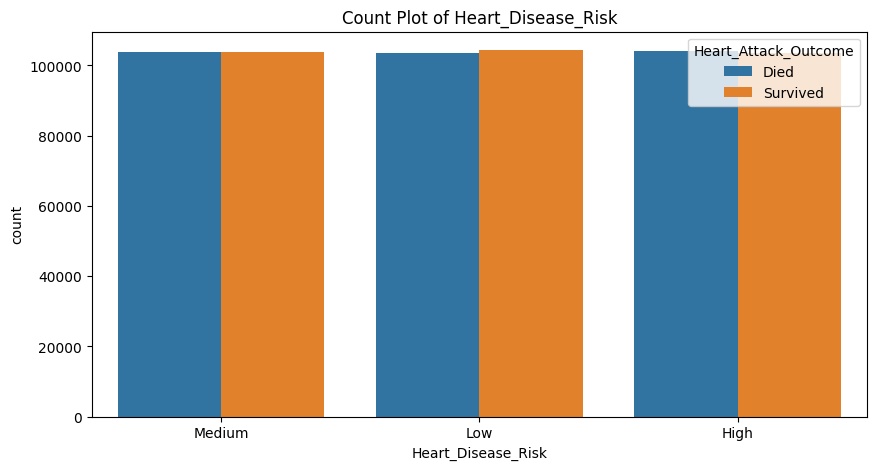

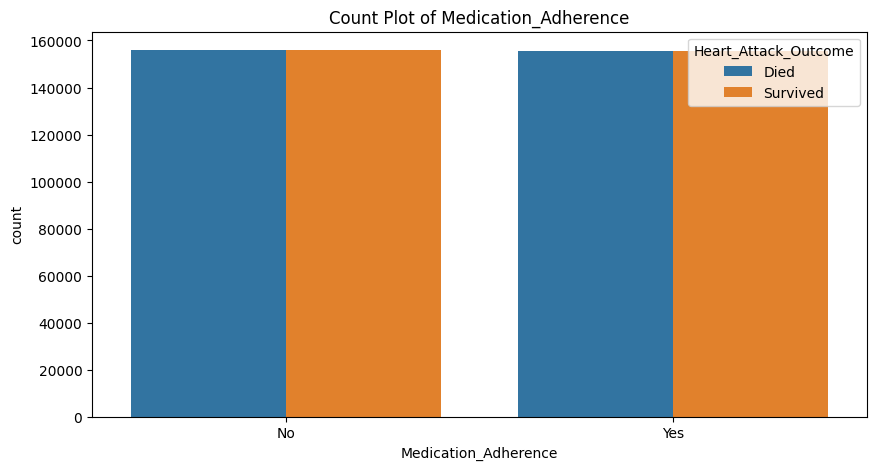

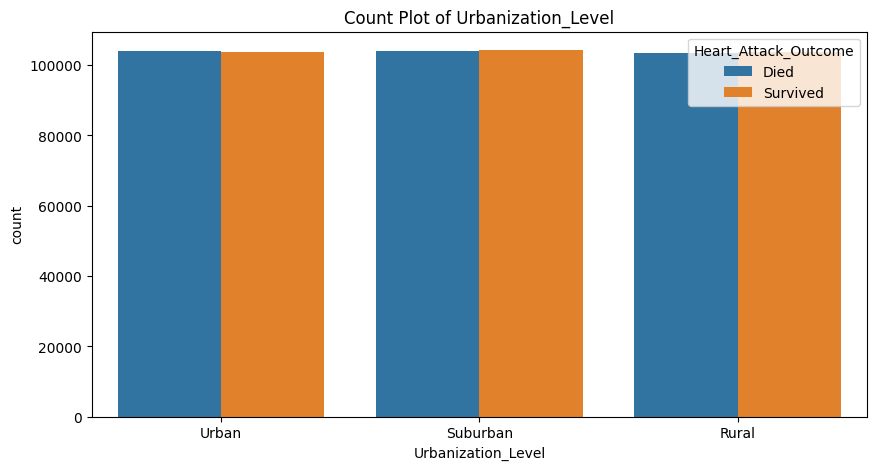

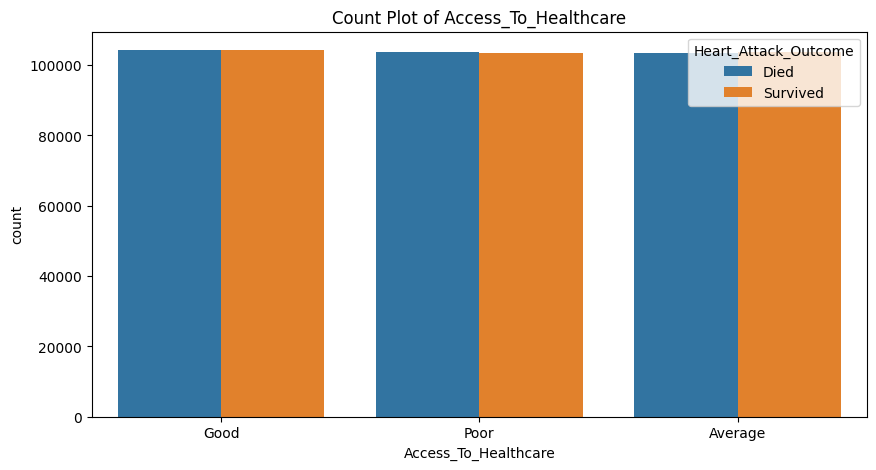

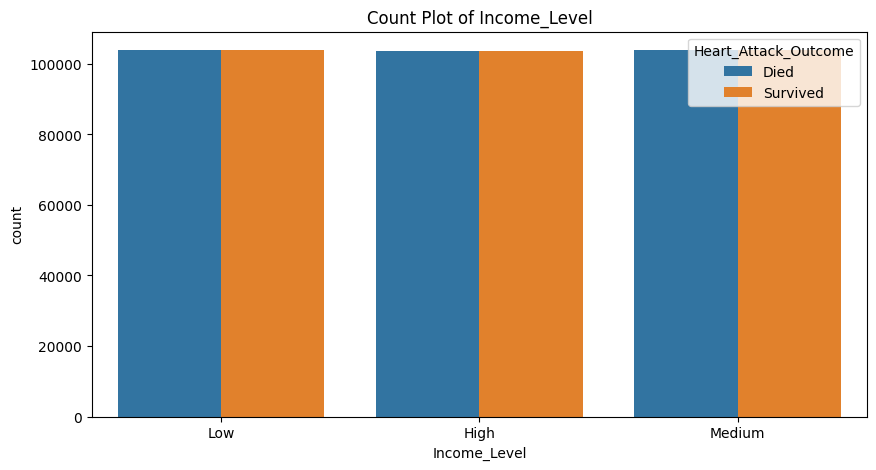

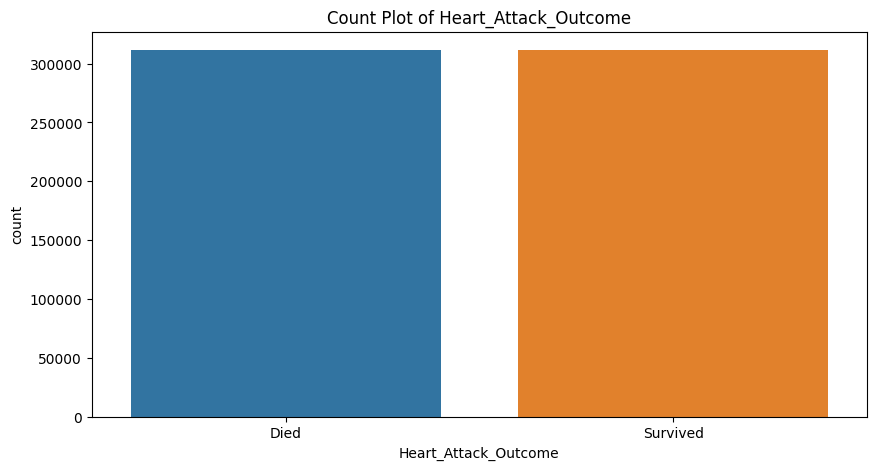

In [17]:
#Traget column compare with categorical columns
for col in cat_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x=col,hue='Heart_Attack_Outcome',data=df)
  plt.title(f'Count Plot of {col}')
  plt.show()

#***Scaled Dataset:-***

In [18]:
sc=StandardScaler()
df[num_col]=sc.fit_transform(df[num_col])

#***Encoding:-***

In [19]:
le=LabelEncoder()
encoder={}
for col in cat_col:
  df[col]=le.fit_transform(df[col])
  encoder[col]=le

#***correlation:-***

In [20]:
#correlation rwith target column
df.corrwith(df['Heart_Attack_Outcome']).sort_values(ascending=False)

,0
Heart_Attack_Outcome,1.000000
Max_Heart_Rate_Achieved,0.002502
Gender,0.001581
Family_History,0.001183
Smoking_History,0.000881
Air_Pollution_Exposure,0.000875
Heart_Disease_Risk,0.000763
Obesity,0.000695
Dietary_Habits,0.000564
Thalassemia,0.000505


In [21]:
df.columns

Index(['Age', 'Gender', 'Cholesterol_Level', 'Blood_Pressure',
       'Smoking_History', 'Alcohol_Consumption', 'Physical_Activity',
       'Obesity', 'Diabetes', 'Family_History', 'Stress_Levels',
       'Dietary_Habits', 'Heart_Attack_History', 'Chest_Pain',
       'Exercise_Induced_Angina', 'Resting_ECG', 'Max_Heart_Rate_Achieved',
       'Thalassemia', 'HDL_Cholesterol', 'LDL_Cholesterol', 'Triglycerides',
       'Heart_Disease_Risk', 'Medication_Adherence', 'Urbanization_Level',
       'Air_Pollution_Exposure', 'Access_To_Healthcare', 'Income_Level',
       'Heart_Attack_Outcome'],
      dtype='object')

In [22]:
#drop column as per target column
df.drop(columns=['Air_Pollution_Exposure','Heart_Disease_Risk'],axis=1,inplace=True)

#***spliting DataSet in tto X,y:-***

In [23]:
X=df.drop('Heart_Attack_Outcome',axis=1)
y=df['Heart_Attack_Outcome']

In [24]:
#check the target column values distribution evenly or not
y.value_counts()

,count
Heart_Attack_Outcome,
1,311592
0,311435


#***Feature selection:-***

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X,y)

RandomForestClassifier(random_state=42)

In [26]:
feature_importance = pd.Series(rfc.feature_importances_, index=X.columns)

# Sort features by importance (descending)
feature_importance_sorted = feature_importance.sort_values(ascending=False)

# Print sorted feature importance
print(feature_importance_sorted)

HDL_Cholesterol            0.088411
Cholesterol_Level          0.088350
LDL_Cholesterol            0.088275
Triglycerides              0.088210
Blood_Pressure             0.088152
Alcohol_Consumption        0.088125
Stress_Levels              0.087990
Max_Heart_Rate_Achieved    0.076922
Age                        0.072074
Access_To_Healthcare       0.019561
Thalassemia                0.019498
Physical_Activity          0.019341
Urbanization_Level         0.019300
Dietary_Habits             0.019299
Income_Level               0.019105
Smoking_History            0.018757
Medication_Adherence       0.011776
Exercise_Induced_Angina    0.011720
Diabetes                   0.011621
Obesity                    0.011613
Resting_ECG                0.011237
Gender                     0.011134
Family_History             0.011129
Heart_Attack_History       0.010703
Chest_Pain                 0.007698
dtype: float64


In [27]:
# Get feature importance scores
feature_importance = pd.Series(rfc.feature_importances_, index=X.columns)

# Sort features by importance (descending)
feature_importance_sorted = feature_importance.sort_values(ascending=False)

# Select the top 15 features
top_15_features = feature_importance_sorted.head(15).index.tolist()
top_15_features

['HDL_Cholesterol',
 'Cholesterol_Level',
 'LDL_Cholesterol',
 'Triglycerides',
 'Blood_Pressure',
 'Alcohol_Consumption',
 'Stress_Levels',
 'Max_Heart_Rate_Achieved',
 'Age',
 'Access_To_Healthcare',
 'Thalassemia',
 'Physical_Activity',
 'Urbanization_Level',
 'Dietary_Habits',
 'Income_Level']

In [28]:
X.columns

Index(['Age', 'Gender', 'Cholesterol_Level', 'Blood_Pressure',
       'Smoking_History', 'Alcohol_Consumption', 'Physical_Activity',
       'Obesity', 'Diabetes', 'Family_History', 'Stress_Levels',
       'Dietary_Habits', 'Heart_Attack_History', 'Chest_Pain',
       'Exercise_Induced_Angina', 'Resting_ECG', 'Max_Heart_Rate_Achieved',
       'Thalassemia', 'HDL_Cholesterol', 'LDL_Cholesterol', 'Triglycerides',
       'Medication_Adherence', 'Urbanization_Level', 'Access_To_Healthcare',
       'Income_Level'],
      dtype='object')

In [29]:
# Drop columns not present in top_15_features from X
X.drop(columns=[col for col in X.columns if col not in top_15_features], inplace=True)

In [30]:
X.columns

Index(['Age', 'Cholesterol_Level', 'Blood_Pressure', 'Alcohol_Consumption',
       'Physical_Activity', 'Stress_Levels', 'Dietary_Habits',
       'Max_Heart_Rate_Achieved', 'Thalassemia', 'HDL_Cholesterol',
       'LDL_Cholesterol', 'Triglycerides', 'Urbanization_Level',
       'Access_To_Healthcare', 'Income_Level'],
      dtype='object')

#***Spliting In to Train & Test:-***

In [31]:
#split train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
#shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((498421, 15), (124606, 15), (498421,), (124606,))

#***Building Model:-***

In [33]:
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [34]:
#predict
y_pred=model.predict(X_test)

In [35]:
#evaluate model
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)

Accuracy: 0.4987560791615171


#***save the Model:-***

In [38]:
 import joblib
 joblib.dump(model,'heart_attack_model.pkl')

['heart_attack_model.pkl']